# D208 Predictive Modeling Performance Assessment  Task 2
By Matthew Heino


### Purpose:
This is a Jupyter Notebook for the D208 assessment for Predictive Modeling.  This notebook will be used in conjunction with a written document to explore data.  Concepts that will be explored in this notebook will be:
- Logistic Regression
- Data preparation 
- Identifying independent and dependent variables that are applicable to a question.
- Data transformation, transforming data into a form that cn be used on a linear regression.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.

# A. Research Question.
1. The research question will be discussed in the written document that accompanies this Jupyter Notebook.  
2. The goals of the analysis will be be discussed in the written document.

## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn import preprocessing
#from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 20)

# Read in the CSV file into a pandas dataframe.
# Read in only specific columns into the dataframe.
lin_cols = ['Age', 'Gender','ReAdmis','VitD_levels','vitD_supp','HighBlood'
            ,'Initial_admin','Complication_risk','Asthma','Diabetes'
            ,'BackPain','Asthma','Stroke','Initial_days'
            ]

medical_df = pd.read_csv('medical_clean.csv', usecols=lin_cols)

print("Medical dataframe information: \n" , medical_df.info())

# Print the first five rows of the data frame
print(medical_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Gender             10000 non-null  object 
 2   ReAdmis            10000 non-null  object 
 3   VitD_levels        10000 non-null  float64
 4   vitD_supp          10000 non-null  int64  
 5   Initial_admin      10000 non-null  object 
 6   HighBlood          10000 non-null  object 
 7   Stroke             10000 non-null  object 
 8   Complication_risk  10000 non-null  object 
 9   Diabetes           10000 non-null  object 
 10  BackPain           10000 non-null  object 
 11  Asthma             10000 non-null  object 
 12  Initial_days       10000 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1015.8+ KB
Medical dataframe information: 
 None
   Age  Gender ReAdmis  VitD_levels  vitD_supp        Initial_admin H

In [3]:
print("Medical dataframe information: \n" , medical_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Gender             10000 non-null  object 
 2   ReAdmis            10000 non-null  object 
 3   VitD_levels        10000 non-null  float64
 4   vitD_supp          10000 non-null  int64  
 5   Initial_admin      10000 non-null  object 
 6   HighBlood          10000 non-null  object 
 7   Stroke             10000 non-null  object 
 8   Complication_risk  10000 non-null  object 
 9   Diabetes           10000 non-null  object 
 10  BackPain           10000 non-null  object 
 11  Asthma             10000 non-null  object 
 12  Initial_days       10000 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1015.8+ KB
Medical dataframe information: 
 None


Reviewing the information from the execution info() method, it is noted, that there are no missing values in the columns that are to be used in the assessment.

In [4]:
# Print the first five rows of the data frame
print(medical_df.head(5))

   Age  Gender ReAdmis  VitD_levels  vitD_supp        Initial_admin HighBlood  \
0   53    Male      No    19.141466          0  Emergency Admission       Yes   
1   51  Female      No    18.940352          1  Emergency Admission       Yes   
2   53  Female      No    18.057507          0   Elective Admission       Yes   
3   78    Male      No    16.576858          0   Elective Admission        No   
4   22  Female      No    17.439069          2   Elective Admission        No   

  Stroke Complication_risk Diabetes BackPain Asthma  Initial_days  
0     No            Medium      Yes      Yes    Yes     10.585770  
1     No              High       No       No     No     15.129562  
2     No            Medium      Yes       No     No      4.772177  
3    Yes            Medium       No       No    Yes      1.714879  
4     No               Low       No       No     No      1.254807  


# C. Data Preparation.
This section will contain the code that will be used to clean and prepare the data that will be used in subsequent sections of this assessment.  Any questions that require text based answers will be included in the accompanying document.

Code included in this section:
 - Code for creating summary statistics for the features.
 - Visualizations of the data that was discussed in the previous section of the document.  There will be visualizations of the variables both independent and dependent variables that will be the focus of the research question.  These visualizations will be both univariate and bivariate.  There will a brief description of them where appropriate.
 - Data wrangling code will be included in this section.
 - Code for creating the prepared data will be given below.

## C1.  Data Cleaning
Steps:  
1. Look for duplicate data in the set.
2. Look for missing values in the data set.
3. Look for outliers in continuous variables of the dataset the data set.
4. Tranform/Encode the categorical variables. (Found in C4)
5. Look multicollinearity among the features. (Found in C4)

### Step 1. Look for duplicates. 

In [5]:
# Check for duplicates in the dataset.
# Step 1
medical_dups = medical_df[medical_df.duplicated()]
print("Duplicated rows: \n",medical_dups)

Duplicated rows: 
 Empty DataFrame
Columns: [Age, Gender, ReAdmis, VitD_levels, vitD_supp, Initial_admin, HighBlood, Stroke, Complication_risk, Diabetes, BackPain, Asthma, Initial_days]
Index: []


**Note:**  There were no duplicated rows found in the columns used for this part of the assessment.

### Step 2. Look for missing values. 

In [6]:
#Step 2
# Count the number of missing values for the dataframe.
#check if there are missing values in dataset
print("\nAre there any missing values: ",medical_df.isnull().values.any())
print("\nTotal missing values: ", medical_df.isnull().sum())


Are there any missing values:  False

Total missing values:  Age                  0
Gender               0
ReAdmis              0
VitD_levels          0
vitD_supp            0
Initial_admin        0
HighBlood            0
Stroke               0
Complication_risk    0
Diabetes             0
BackPain             0
Asthma               0
Initial_days         0
dtype: int64


AxesSubplot(0.125,0.11;0.698618x0.77)


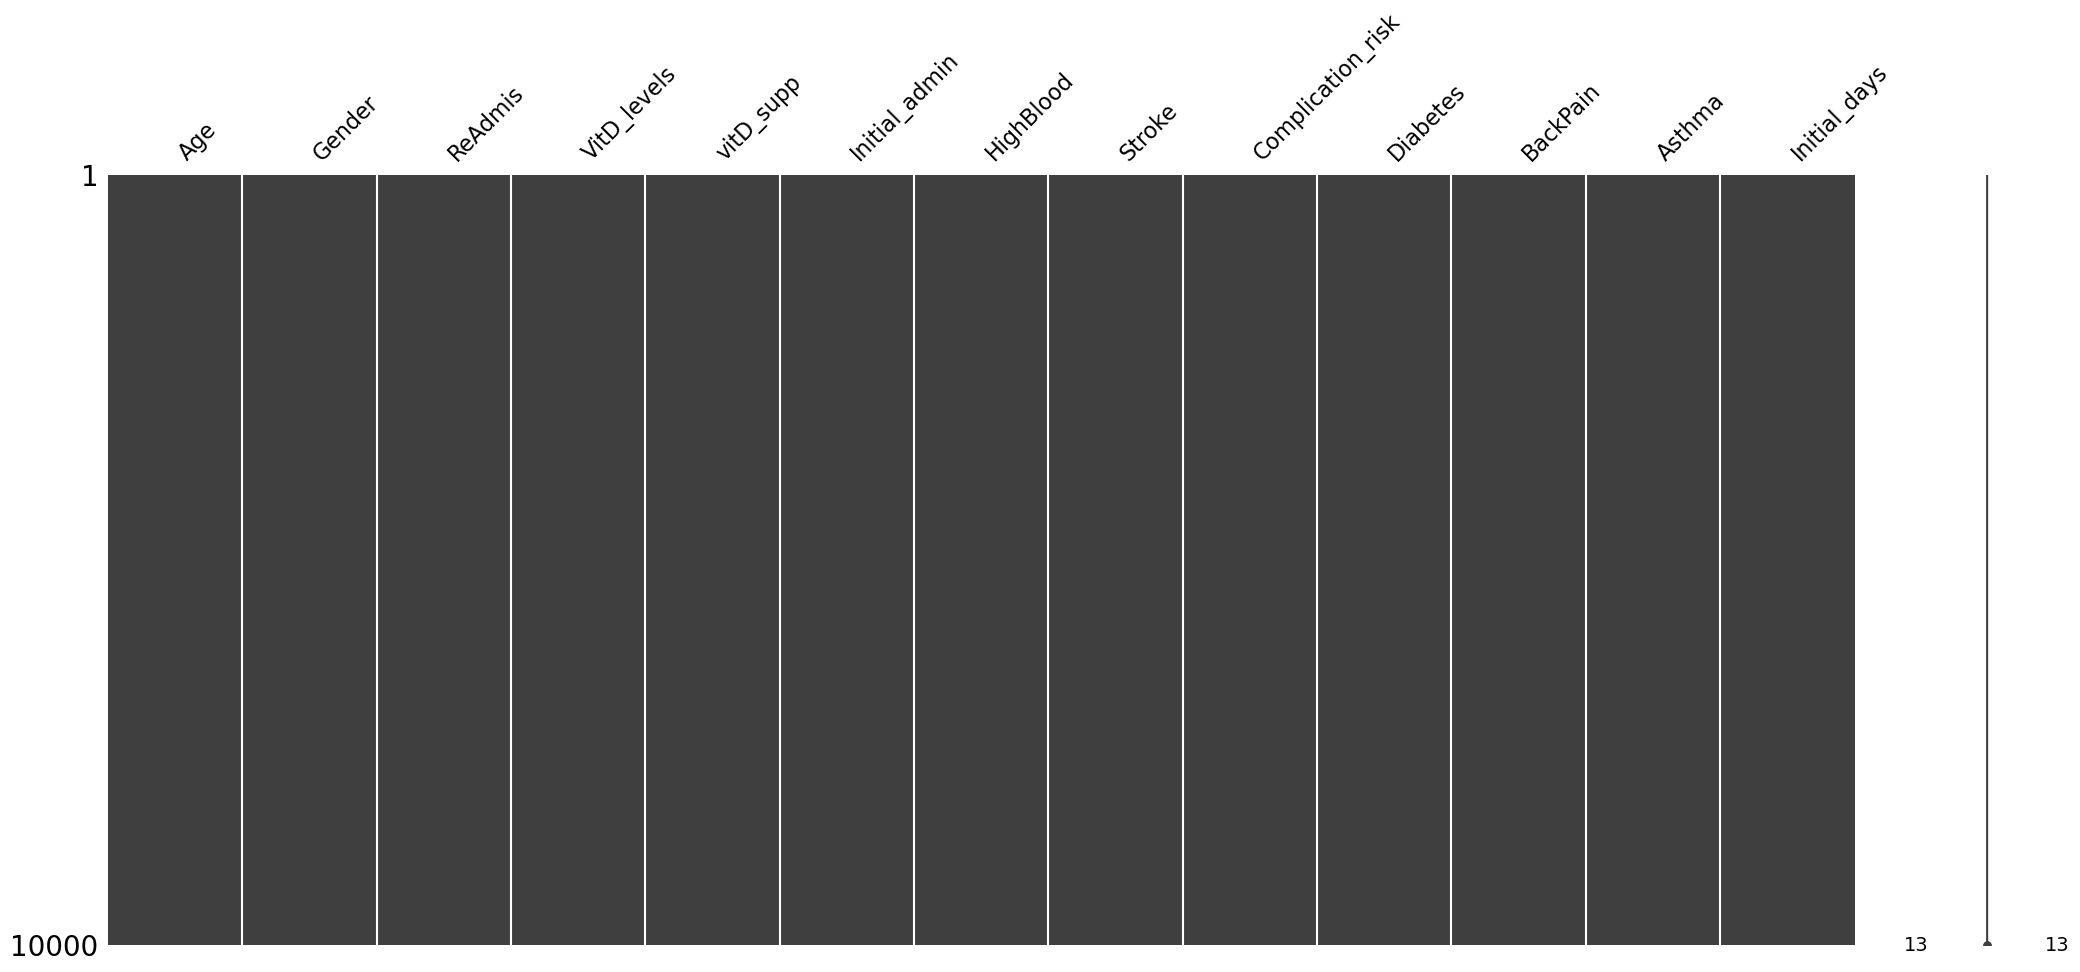

In [7]:
# Create a missing matrix using Missingno library.
print(msno.matrix(medical_df))

As noted in the **info()** method there are no null values found in the dataset.  All columns of the dataframe show that there are 10,000 entries for the columns.  No imputing of data will be needed in for the features in the dataframe.

### Step 3. Look for outliers in the data set.
This step will be accomplished using a boxplot to look at the data that is contained in the continuous variables of of the dataset.
Variables that will be evaluated are:
- Age
- VitD_levels
- vitD_supp
- Initial_days

Method used to determine if the there are outliers will be the interquartile range method (IQR).  The IQR method was used in the data cleaning assessment and will be employed here.

**Note:** The code for this section is essentially the same that was used in the D206 assessment regarding data cleaning.

Desription of Age: 
 count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


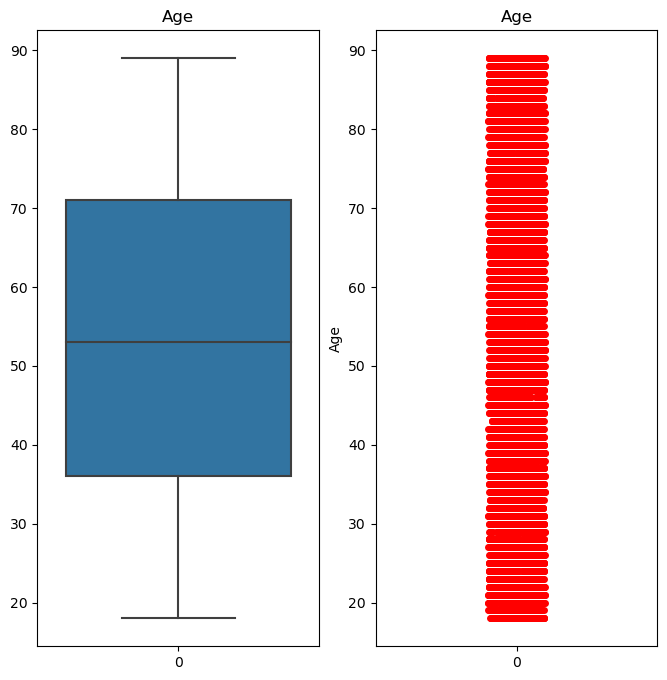

In [8]:
# Age
print('Desription of Age: \n', medical_df['Age'].describe())
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Age'], ax = ax1).set(title="Age")
sns.stripplot(data=medical_df['Age'], ax=ax2, color='red').set(title="Age")
plt.show()

In [ ]:
#IQR

#lower_bound = medical_df['Age'].quantile(0.25)
#upper_bound = medical_df['Age'].quantile(0.75)
#IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
#threshold = 1.5
#outliers = medical_df[(medical_df['Age']  < lower_bound - threshold * IQR ) 
#                 |(medical_df['Age']  > upper_bound + threshold * IQR )] 

#print("Lower bound: ", lower_bound)
#print("Upper bound: ", upper_bound)
#print("\nOutliers shape: ", outliers.shape)

#medical_df = medical_df.drop(outliers.index)

#print("Shape after dropping Age outliers: ",medical_df.shape)
#print('Desription of Age: \n',medical_df['Age'].describe())

No outliers were found in this feature.  The code will be commented out and preserved for later use.

### VitD_levels

Desription of Vitamin D levels: 
 count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


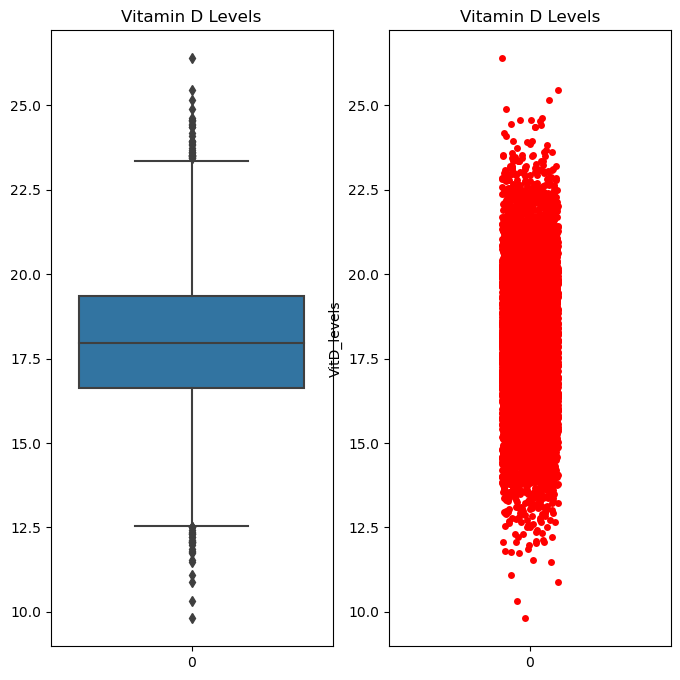

In [9]:
print('Desription of Vitamin D levels: \n', medical_df['VitD_levels'].describe())
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['VitD_levels'], ax = ax1).set(title="Vitamin D Levels")
sns.stripplot(data=medical_df['VitD_levels'], ax=ax2, color='red').set(title="Vitamin D Levels")
plt.show()

In [10]:
#IQR
lower_bound = medical_df['VitD_levels'].quantile(0.25)
upper_bound = medical_df['VitD_levels'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
threshold = 1.5
outliers = medical_df[(medical_df['VitD_levels']  < lower_bound - threshold * IQR ) 
                 |(medical_df['VitD_levels']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("\nOutliers shape: ", outliers.shape)

medical_df = medical_df.drop(outliers.index)

print("Shape after dropping Vitamin D levels outliers: ",medical_df.shape)
print('Desription of Age: \n',medical_df['VitD_levels'].describe())

Lower bound:  16.6264386125
Upper bound:  19.3479625

Outliers shape:  (60, 13)
Shape after dropping Vitamin D levels outliers:  (9940, 13)
Desription of Age: 
 count    9940.000000
mean       17.960467
std         1.966010
min        12.546070
25%        16.633120
50%        17.949830
75%        19.335520
max        23.363658
Name: VitD_levels, dtype: float64


### vitD_supp

Desription of Vitamin D supps: 
 count    9940.000000
mean        0.398290
std         0.628031
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: vitD_supp, dtype: float64


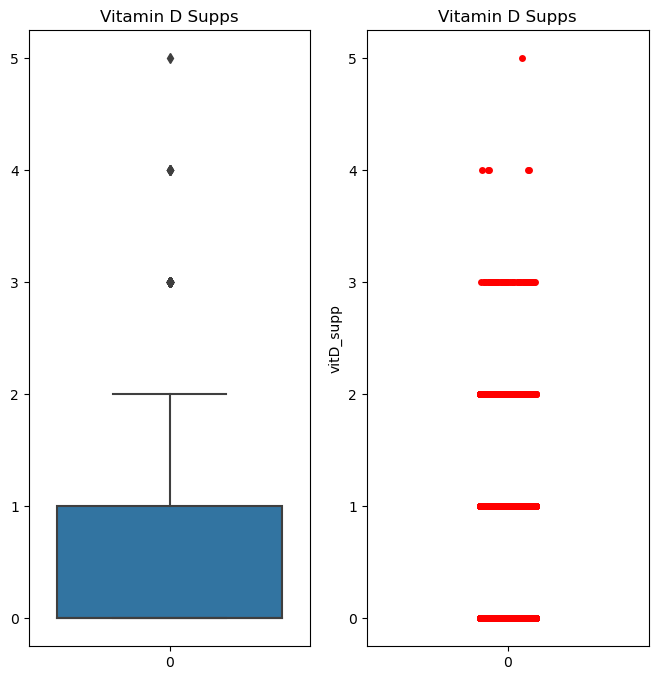

In [11]:
print('Desription of Vitamin D supps: \n', medical_df['vitD_supp'].describe())
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['vitD_supp'], ax = ax1).set(title="Vitamin D Supps")
sns.stripplot(data=medical_df['vitD_supp'], ax=ax2, color='red').set(title="Vitamin D Supps")
plt.show()

In [12]:
#IQR
lower_bound = medical_df['vitD_supp'].quantile(0.25)
upper_bound = medical_df['vitD_supp'].quantile(0.75)
IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
threshold = 1.5
outliers = medical_df[(medical_df['vitD_supp']  < lower_bound - threshold * IQR ) 
                 |(medical_df['vitD_supp']  > upper_bound + threshold * IQR )] 

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound)
print("\nOutliers shape: ", outliers.shape)

medical_df = medical_df.drop(outliers.index)

print("Shape after dropping Vitamin D supps outliers: ",medical_df.shape)
print('Desription of Age: \n',medical_df['vitD_supp'].describe())

Lower bound:  0.0
Upper bound:  1.0

Outliers shape:  (70, 13)
Shape after dropping Vitamin D supps outliers:  (9870, 13)
Desription of Age: 
 count    9870.000000
mean        0.379129
std         0.586719
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: vitD_supp, dtype: float64


### Initial_days

Desription of Initial Days: 
 count    9870.000000
mean       34.482415
std        26.318973
min         1.001981
25%         7.908866
50%        36.215360
75%        61.195822
max        71.981490
Name: Initial_days, dtype: float64


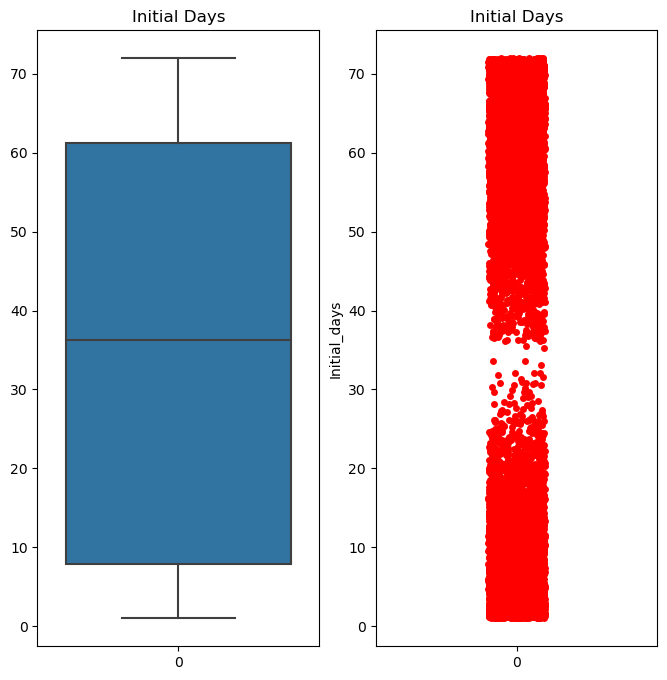

In [13]:
print('Desription of Initial Days: \n', medical_df['Initial_days'].describe())
fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), ncols=2, sharex= True,
                                    sharey=False)
sns.boxplot(data=medical_df['Initial_days'], ax = ax1).set(title="Initial Days")
sns.stripplot(data=medical_df['Initial_days'], ax=ax2, color='red').set(title="Initial Days")
plt.show()

In [ ]:
#IQR

#lower_bound = medical_df['Initial_days'].quantile(0.25)
#upper_bound = medical_df['Initial_days'].quantile(0.75)
#IQR = upper_bound - lower_bound

# Identify the outliers in the dataframe
#threshold = 1.5
#outliers = medical_df[(medical_df['Initial_days']  < lower_bound - threshold * IQR ) 
#                 (medical_df['Initial_days']  > upper_bound + threshold * IQR )] 

#print("Lower bound: ", lower_bound)
#print("Upper bound: ", upper_bound)
#print("\nOutliers shape: ", outliers.shape)

#medical_df = medical_df.drop(outliers.index)

#print("Shape after dropping Initia Days supps outliers: ",medical_df.shape)
#print('Desription of Age: \n',medical_df['Initial_days'].describe())


No outliers were found in this feature.  The code will be commented out and preserved for later use.

## C2. Data Exploration
In this section, there will be calculations about the variables that are found in the dataset that will be used in the regression. Statistics will be calculated using functions like describe() to get the appropriate statistics.
The varaibles that will be covered in this section are:

| Variable | Data Type | Purpose|
| ----------- | ----------- |---------- |
| Age | Continuous | Predictor
| Gender | Categorical| Predictor
| VitD_levels |Continuous|Predictor
| vitD_supp |Categorical |Predictor
| HighBlood |Categorical |Predictor
|Initial_admin| Categorical| Predictor
|Complication_risk|Categorical|Predictor
| ReAdmis |Categorical|Target
|Diabetes|Categorical|Predictor
|BackPain|Categorical|Predictor
| Stroke |Categorical |Predictor
|Initial_days|Continuous| Predictor
|Asthma|Categorical|Predictor

### Continuous Variables
This section will display the summary statistics for the continuous variables for the chosen features.

In [14]:
# Citation: (Pandas.DataFrame.Select_Dtypes — Pandas 2.1.3 Documentation, n.d.)
medical_cont_cols = medical_df.select_dtypes(include='number').columns

for col_name in medical_cont_cols:
    print("\nThe summary statistics for ", col_name)
    print(medical_df[col_name].describe())


The summary statistics for  Age
count    9870.000000
mean       53.500811
std        20.656765
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

The summary statistics for  VitD_levels
count    9870.000000
mean       17.959229
std         1.965850
min        12.546070
25%        16.633215
50%        17.946174
75%        19.334015
max        23.363658
Name: VitD_levels, dtype: float64

The summary statistics for  vitD_supp
count    9870.000000
mean        0.379129
std         0.586719
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: vitD_supp, dtype: float64

The summary statistics for  Initial_days
count    9870.000000
mean       34.482415
std        26.318973
min         1.001981
25%         7.908866
50%        36.215360
75%        61.195822
max        71.981490
Name: Initial_days, dtype: float64


### Categorical Variables

This section will display the summary statistics for the categorical variables for the chosen features.

In [15]:
medical_cat_cols = medical_df.select_dtypes(include='object').columns

for col_name in medical_cat_cols:
    print("\n\nThe summary statistics for ", col_name)
    print(medical_df[col_name].describe())
    print(medical_df.groupby([col_name]).size())



The summary statistics for  Gender
count       9870
unique         3
top       Female
freq        4957
Name: Gender, dtype: object
Gender
Female       4957
Male         4701
Nonbinary     212
dtype: int64


The summary statistics for  ReAdmis
count     9870
unique       2
top         No
freq      6234
Name: ReAdmis, dtype: object
ReAdmis
No     6234
Yes    3636
dtype: int64


The summary statistics for  Initial_admin
count                    9870
unique                      3
top       Emergency Admission
freq                     4999
Name: Initial_admin, dtype: object
Initial_admin
Elective Admission       2466
Emergency Admission      4999
Observation Admission    2405
dtype: int64


The summary statistics for  HighBlood
count     9870
unique       2
top         No
freq      5831
Name: HighBlood, dtype: object
HighBlood
No     5831
Yes    4039
dtype: int64


The summary statistics for  Stroke
count     9870
unique       2
top         No
freq      7899
Name: Stroke, dtype: object
St

## C3. Data Visualizations
In this section, there will be visualizations of the dataset's features.  Ther will be both univariate and bivariate depictions of the data.  These visualizations will be included in the written document.

### Univariate Visualizations
This section will contain data visualizations for the features that have been chosen for creating the regression model.

### Continuous Visualization Variables.

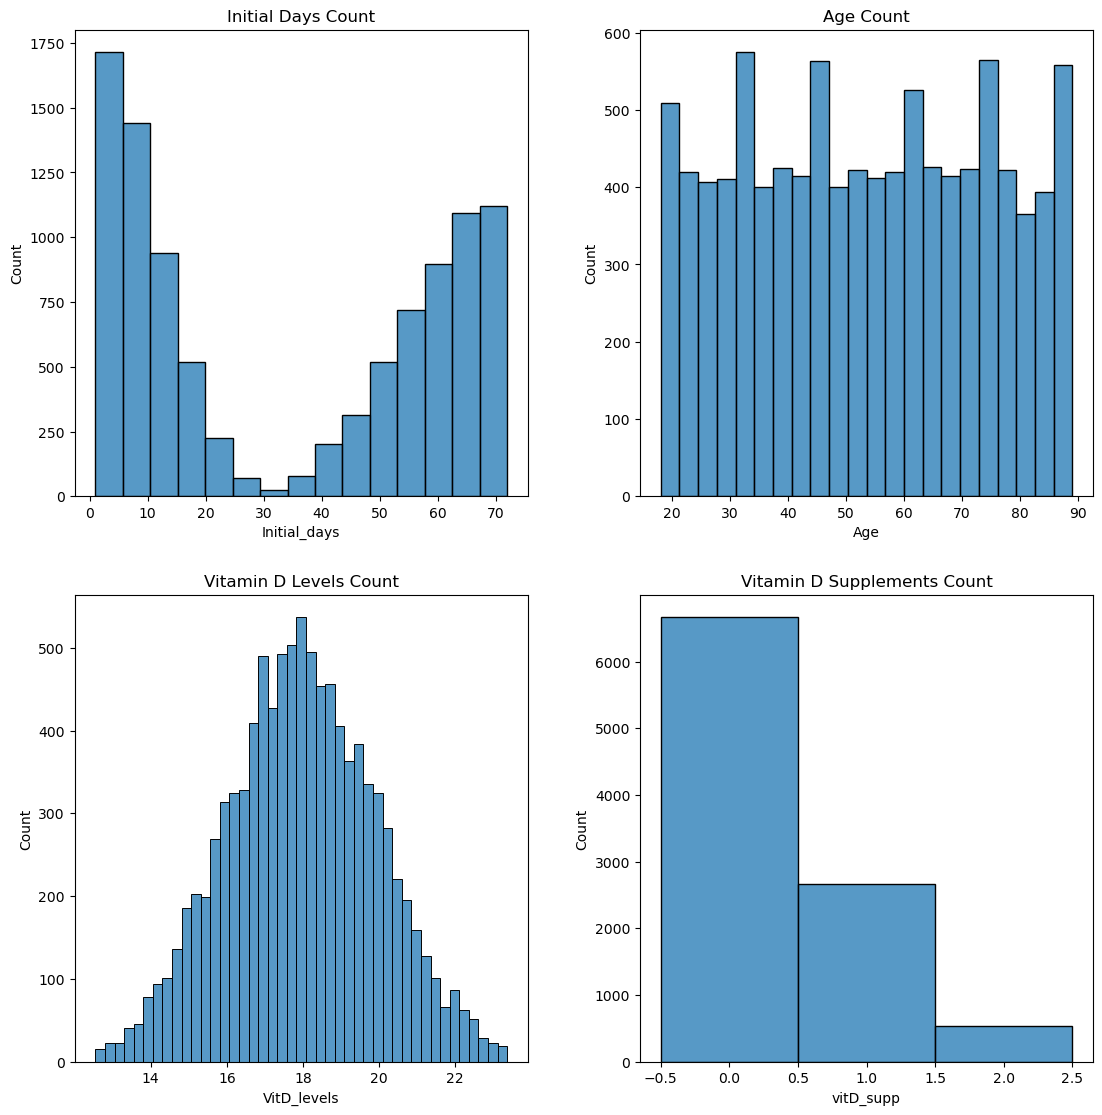

In [16]:
# Citations: (Seaborn.Histplot — Seaborn 0.13.0 Documentation, n.d.) 
# and (Creating Multiple Subplots Using Plt.Subplots — Matplotlib 3.8.2 Documentation, n.d.)

fig, axs = plt.subplots(figsize=(12,12),nrows=2, ncols=2, sharex=False, sharey=False)
fig.tight_layout(pad=5.0)
sns.histplot(data=medical_df['Initial_days'],ax=axs[0,0]).set(title='Initial Days Count')
sns.histplot(data=medical_df['Age'], ax=axs[0,1]).set(title='Age Count')
sns.histplot(data=medical_df['VitD_levels'], ax=axs[1,0]).set(title='Vitamin D Levels Count')
sns.histplot(data=medical_df['vitD_supp'], discrete=True,
             ax=axs[1,1]).set(title='Vitamin D Supplements Count')
plt.show()

### Univariate Categorical Visualizations.

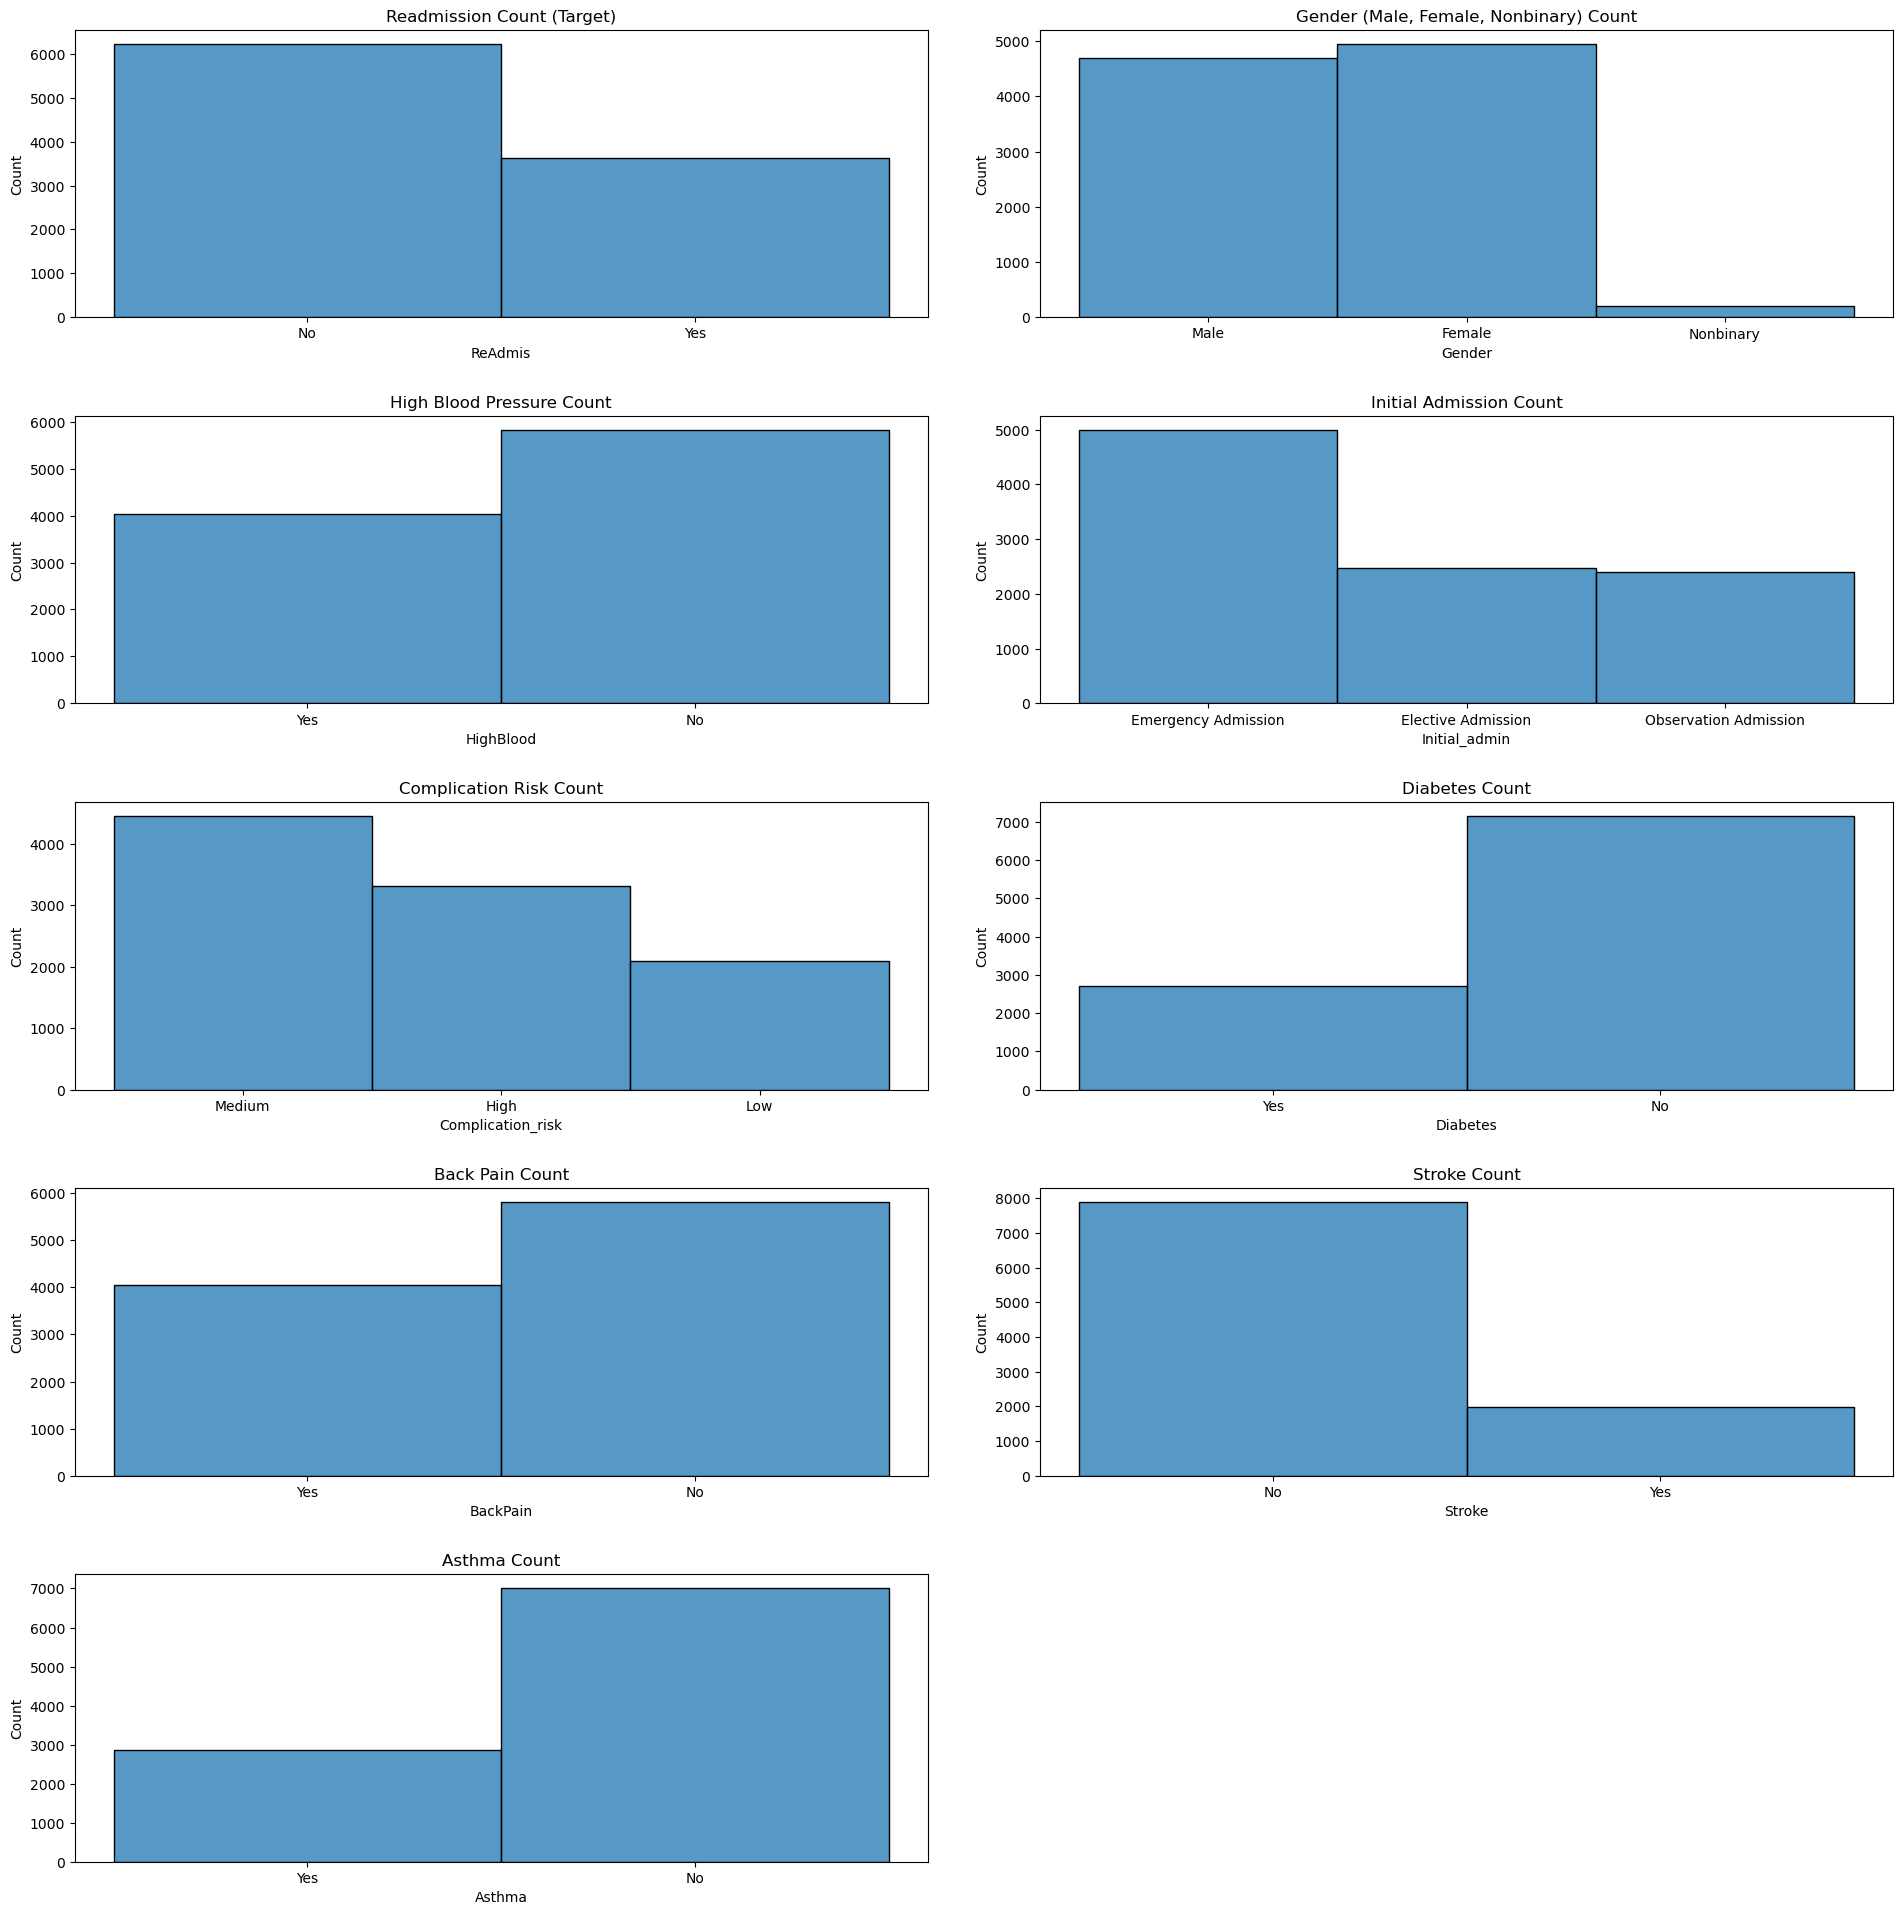

In [17]:
# Citations (Seaborn.Histplot — Seaborn 0.13.0 Documentation, n.d.) 
# and (Creating Multiple Subplots Using Plt.Subplots — Matplotlib 3.8.2 Documentation, n.d.)

fig, axs = plt.subplots(figsize=(20,20),nrows=5, ncols=2, sharex=False
                        , sharey=False)
fig.tight_layout(pad=5.0)
                 
sns.histplot(data=medical_df['ReAdmis']
             ,ax=axs[0, 0]).set(title='Readmission Count (Target)')
sns.histplot(data=medical_df['Gender']
             ,ax=axs[0, 1]).set(title='Gender (Male, Female, Nonbinary) Count')
sns.histplot(data=medical_df['HighBlood']
             ,ax=axs[1, 0]).set(title='High Blood Pressure Count')
sns.histplot(data=medical_df['Initial_admin']
             ,ax=axs[1, 1]).set(title='Initial Admission Count')
sns.histplot(data=medical_df['Complication_risk']
             ,ax=axs[2, 0]).set(title='Complication Risk Count')
sns.histplot(data=medical_df['Diabetes']
             ,ax=axs[2, 1]).set(title='Diabetes Count')
sns.histplot(data=medical_df['BackPain']
             ,ax=axs[3,0]).set(title='Back Pain Count')
sns.histplot(data=medical_df['Stroke']
             ,ax=axs[3,1]).set(title='Stroke Count')
sns.histplot(data=medical_df['Asthma']
             ,ax=axs[4,0]).set(title='Asthma Count')
fig.delaxes(axs[4,1])              
plt.show()

### Bivariate Visualizations
This section will contain data visualizations for the features that have been chosen for creating the regression model.

### Bivariate Continuous

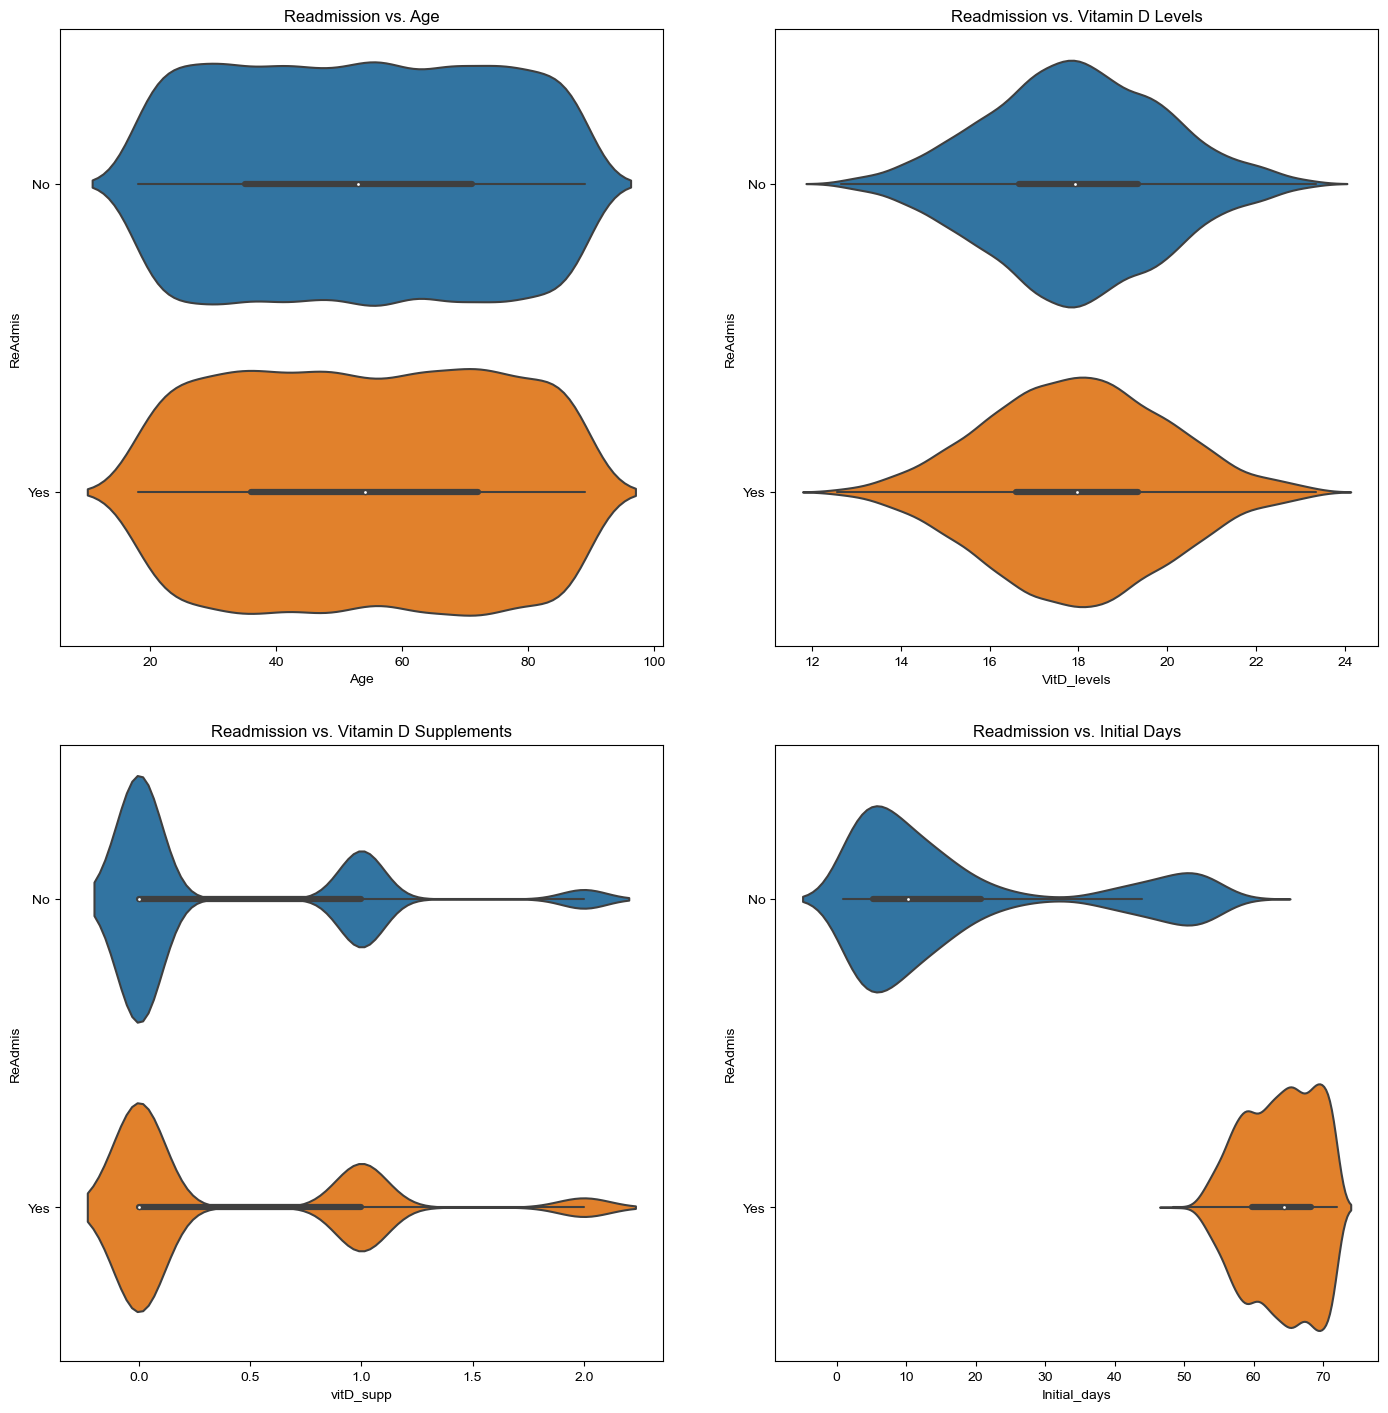

In [18]:
# Visualizations Citation (Seaborn.Violinplot() Method, n.d.)
# Target: ReAdmis
fig,axs = plt.subplots(figsize=(15, 15), ncols=2,nrows=2, sharex= False,
                                    sharey=False)
fig.tight_layout(pad=5)
sns.set_style("darkgrid")

sns.violinplot(data=medical_df,x='Age', y='ReAdmis'
             , ax=axs[0,0]).set(title="Readmission vs. Age")
sns.violinplot(data=medical_df,x='VitD_levels', y='ReAdmis',
              ax=axs[0,1]).set(title="Readmission vs. Vitamin D Levels")
sns.violinplot(data=medical_df,x='vitD_supp', y='ReAdmis',
              ax=axs[1,0]).set(title="Readmission vs. Vitamin D Supplements")
sns.violinplot(data=medical_df,x='Initial_days', y='ReAdmis',
              ax=axs[1,1]).set(title="Readmission vs. Initial Days")

plt.show()

### Bivariate Categorical

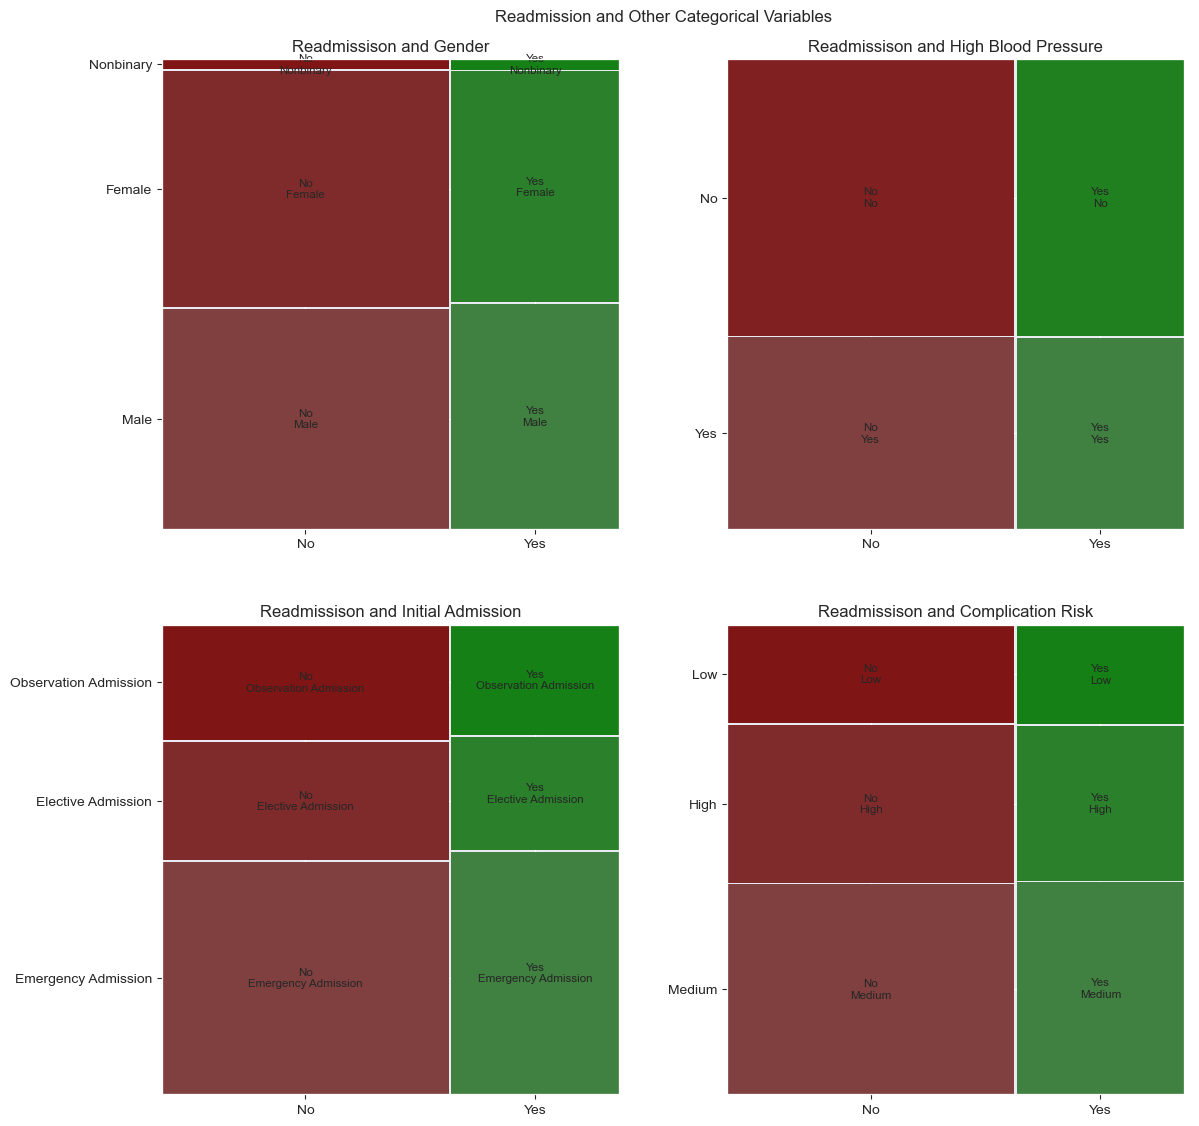

In [19]:
# Bivariate Categorical
# Citation: (statsmodels.graphics.mosaicplot.mosaic - Statsmodels 0.15.0 (+73), n.d.)
fig,axs = plt.subplots(figsize=(12, 12), ncols=2,nrows=2, sharex= False,
                                    sharey=False)
fig.tight_layout(pad=5)
fig.suptitle("Readmission and Other Categorical Variables")

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'Gender']
                   , title='Readmissison and Gender',ax=axs[0,0])

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'HighBlood']
                   ,title='Readmissison and High Blood Pressure'
                   ,ax=axs[0,1])

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'Initial_admin']
                   ,title='Readmissison and Initial Admission'
                   ,ax=axs[1,0])

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'Complication_risk']
                   ,title='Readmissison and Complication Risk'
                   ,ax=axs[1,1])

plt.show()

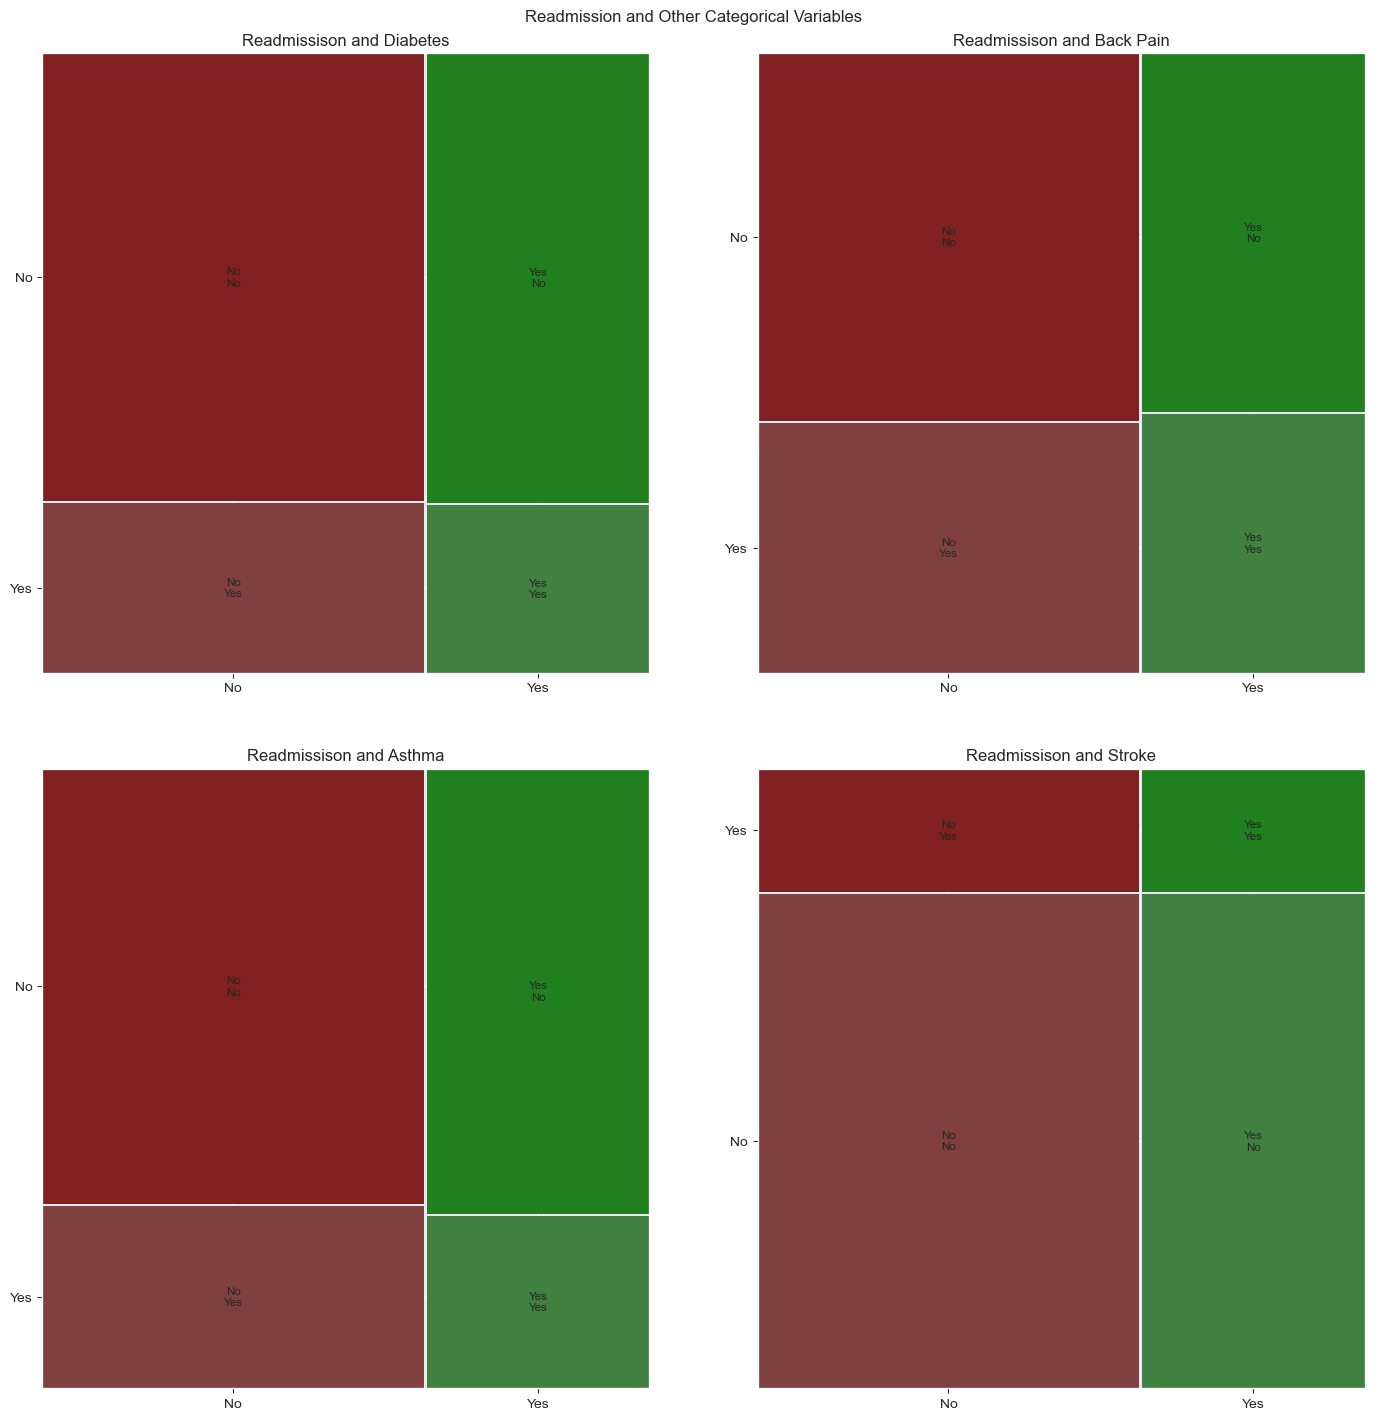

In [20]:
fig,axs = plt.subplots(figsize=(15, 15), ncols=2,nrows=2, sharex= False,
                                    sharey=False)
fig.tight_layout(pad=5)
fig.suptitle("Readmission and Other Categorical Variables")


bi_mosaic = mosaic(medical_df, ['ReAdmis', 'Diabetes']
                   ,title='Readmissison and Diabetes'
                   ,ax=axs[0,0])

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'BackPain']
                   ,title='Readmissison and Back Pain'
                   ,ax=axs[0,1])

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'Asthma']
                   , title='Readmissison and Asthma',ax=axs[1,0])

bi_mosaic = mosaic(medical_df, ['ReAdmis', 'Stroke']
                   , title='Readmissison and Stroke',ax=axs[1,1])

plt.show()


## C4. Data Transformation

### 4. Tranform/Encode the categorical variables.

This step will encode the categoricals to be used in the regression model.

In [21]:
# C4 Transform the categorical variables.
medical_cats_cols = medical_df.select_dtypes(include='object').columns

for name in medical_cats_cols:
    if len(medical_df[name].unique()) > 1:
        medical_df =   pd.get_dummies(medical_df
               ,columns = [name]
               ,drop_first = True,
               prefix = name
               )

print("\n\n\n Medical Info: ",medical_df.info())    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9870 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  9870 non-null   int64  
 1   VitD_levels                          9870 non-null   float64
 2   vitD_supp                            9870 non-null   int64  
 3   Initial_days                         9870 non-null   float64
 4   Gender_Male                          9870 non-null   uint8  
 5   Gender_Nonbinary                     9870 non-null   uint8  
 6   ReAdmis_Yes                          9870 non-null   uint8  
 7   Initial_admin_Emergency Admission    9870 non-null   uint8  
 8   Initial_admin_Observation Admission  9870 non-null   uint8  
 9   HighBlood_Yes                        9870 non-null   uint8  
 10  Stroke_Yes                           9870 non-null   uint8  
 11  Complication_risk_Low         

### Step 5. Looks at multicollinearity among the features.
This step will look at each of the features that will be used to create the regression model. Any feature with a VIF higher than 10 will be dropped from the features that will be used to create the regression model in the next sections of the assessment.

**Note:** Performing this step during the data preparation phase was discussed in Dr. Sewell's webinar. The VIF phases is included here so the data will be ready for creating the regression model.

In [22]:
# Step 5. Looks at multicollinearity 
# Check for multicollinearity. (GeeksforGeeks, 2023)
# Check for Collinearity among Features.

vif_columns= [ 'Age', 'VitD_levels','vitD_supp', 'Initial_days','Gender_Male'
,'Gender_Nonbinary', 'Initial_admin_Emergency Admission'
,'Initial_admin_Observation Admission','HighBlood_Yes','Stroke_Yes','Complication_risk_Low'
,'Complication_risk_Medium','Diabetes_Yes','BackPain_Yes','Asthma_Yes']

X = medical_df[vif_columns]

#Create the VIF dataframe.
vif_df = pd.DataFrame()

# Add the feature columns to the frame and the X columns.
vif_df['Features'] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_df)

                               Features        VIF
0                                   Age   7.257121
1                           VitD_levels  15.191534
2                             vitD_supp   1.414056
3                          Initial_days   2.677844
4                           Gender_Male   1.926508
5                      Gender_Nonbinary   1.043445
6     Initial_admin_Emergency Admission   2.966013
7   Initial_admin_Observation Admission   1.938943
8                         HighBlood_Yes   1.685770
9                            Stroke_Yes   1.248342
10                Complication_risk_Low   1.616683
11             Complication_risk_Medium   2.312695
12                         Diabetes_Yes   1.370258
13                         BackPain_Yes   1.688154
14                           Asthma_Yes   1.405580


Will be removing the VitD_levels from the independent features list.

In [23]:
vif_columns= [ 'Age','vitD_supp', 'Initial_days','Gender_Male'
,'Gender_Nonbinary', 'Initial_admin_Emergency Admission'
,'Initial_admin_Observation Admission','HighBlood_Yes','Stroke_Yes','Complication_risk_Low'
,'Complication_risk_Medium','Diabetes_Yes','BackPain_Yes','Asthma_Yes']

X = medical_df[vif_columns]

#Create the VIF dataframe.
vif_df = pd.DataFrame()

# Add the feature columns to the frame and the X columns.
vif_df['Features'] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_df)

                               Features       VIF
0                                   Age  4.907331
1                             vitD_supp  1.385115
2                          Initial_days  2.483461
3                           Gender_Male  1.833029
4                      Gender_Nonbinary  1.039531
5     Initial_admin_Emergency Admission  2.552400
6   Initial_admin_Observation Admission  1.754969
7                         HighBlood_Yes  1.634342
8                            Stroke_Yes  1.234889
9                 Complication_risk_Low  1.537830
10             Complication_risk_Medium  2.133040
11                         Diabetes_Yes  1.349340
12                         BackPain_Yes  1.648342
13                           Asthma_Yes  1.380816


There are no longer any VIFs above 10 in the dataframe.

### Ouput of the reduced datast.

In [24]:
# Reduced Dataset 
print("\nValues:    ", vif_df['Features'].values )
reduced_vif_df = medical_df[vif_df["Features"].values]
reduced_vif_df['ReAdmis_Yes'] = medical_df['ReAdmis_Yes']
print(reduced_vif_df.info())
print(reduced_vif_df.head())



Values:     ['Age' 'vitD_supp' 'Initial_days' 'Gender_Male' 'Gender_Nonbinary'
 'Initial_admin_Emergency Admission' 'Initial_admin_Observation Admission'
 'HighBlood_Yes' 'Stroke_Yes' 'Complication_risk_Low'
 'Complication_risk_Medium' 'Diabetes_Yes' 'BackPain_Yes' 'Asthma_Yes']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9870 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  9870 non-null   int64  
 1   vitD_supp                            9870 non-null   int64  
 2   Initial_days                         9870 non-null   float64
 3   Gender_Male                          9870 non-null   uint8  
 4   Gender_Nonbinary                     9870 non-null   uint8  
 5   Initial_admin_Emergency Admission    9870 non-null   uint8  
 6   Initial_admin_Observation Admission  9870 non-null   uint8  
 7   HighBlood_Yes

## C5. Prepared Dataset
The code for outputting the prepared dataset is included below.  The prepared CSV file will be included as a submission with this assessment.
- Only variables that have passed VIF are included in this updated CSV file.

In [25]:
# Save the reduced dataframe to a CSV file.
reduced_vif_df.to_csv('Heino_reduced_medical_task2.csv', index = False, header = True)

## D1. Initial Model
This section there will be a preliminary logistic regression created.

In [26]:
# Read the the reduced CSV file.
mlr_df = pd.read_csv('Heino_reduced_medical_task2.csv')

print("Info: ", mlr_df.info())
print("\nContents: \n", mlr_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  9870 non-null   int64  
 1   vitD_supp                            9870 non-null   int64  
 2   Initial_days                         9870 non-null   float64
 3   Gender_Male                          9870 non-null   int64  
 4   Gender_Nonbinary                     9870 non-null   int64  
 5   Initial_admin_Emergency Admission    9870 non-null   int64  
 6   Initial_admin_Observation Admission  9870 non-null   int64  
 7   HighBlood_Yes                        9870 non-null   int64  
 8   Stroke_Yes                           9870 non-null   int64  
 9   Complication_risk_Low                9870 non-null   int64  
 10  Complication_risk_Medium             9870 non-null   int64  
 11  Diabetes_Yes                  

In [27]:
# Create the initial Logistic regression Model.
# Split the set into target and the predictors.
y = mlr_df.ReAdmis_Yes
X = mlr_df.iloc[:, :-1]
X = sm.add_constant(X)

# Create the model.
log_model = sm.Logit(y, X)

# Fit the model and save the results.
results = log_model.fit()

# Print the results of the model.
print(results.summary())#

Optimization terminated successfully.
         Current function value: 0.039386
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_Yes   No. Observations:                 9870
Model:                          Logit   Df Residuals:                     9855
Method:                           MLE   Df Model:                           14
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.9402
Time:                        11:07:39   Log-Likelihood:                -388.74
converged:                       True   LL-Null:                       -6495.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -66.7780      3.401

## D2. Model Reduction Method and Justification
This information will be found in the accompanying Word document.  Please see the appropriate section.

## D3. Reduced Model¶
This section will handle the reduction of the features. The code for this is found below. The discussion will be found in the accompanying document.

In [28]:
X.drop(['vitD_supp','Gender_Male','Gender_Nonbinary','BackPain_Yes'
        ,'Complication_risk_Medium','Diabetes_Yes','Age'], axis=1, inplace=True)
print('X columns: ', X.columns)

log_model = sm.Logit(y,X)
# Fit the model and save the results.
results = log_model.fit()

# Print the results of the model.
print(results.summary())

X columns:  Index(['const', 'Initial_days', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes',
       'Complication_risk_Low', 'Asthma_Yes'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.039794
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_Yes   No. Observations:                 9870
Model:                          Logit   Df Residuals:                     9862
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.9395
Time:                        11:08:04   Log-Likelihood:                -392.77
converged:                       True   LL-Null:                       -6495.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      

# E. Model Comparison

This section will be found in the written document. All discussion, summaries and other pertininent information will be found in the accompanying document.


## E2. Logistic Regression
In this section:
- Confusion Matrix - This will be for the reduced model.
- Accuracy Calculation - This will be for the reduced model

In [29]:
#Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
y_preds = results.predict(X_test)

predictions = list(map(round, y_preds))

conf_matrix = metrics.confusion_matrix(y_test, predictions)
print(conf_matrix)

[[1856   22]
 [  23 1060]]


### Create a visual of the confusion matrix.


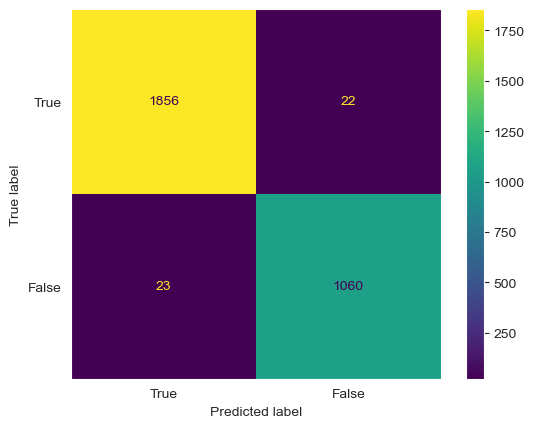

In [30]:
con_mat_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                              display_labels=[True, False])

# Plot the visual.
con_mat_disp.plot()
plt.grid(False)
plt.show()

### Accuracy Calculation

In [31]:
#Accurcacy
# Using the formula. accuracy = (TN + TP) / (TN + FN+ FP + TP)
top = conf_matrix[1,1] + conf_matrix[0,0]

#TN + FN + FP + TP
bottom = conf_matrix[1,1] + conf_matrix[1,0] + conf_matrix[0,1] + conf_matrix[0,0]

accuracy = top / bottom
print("Accuracy using the confusion matrix: ", accuracy)

acc_2 = accuracy_score(y_test, predictions)
print("Accuracy using the method in metrics: ", acc_2)

Accuracy using the confusion matrix:  0.9848024316109423
Accuracy using the method in metrics:  0.9848024316109423


### F1. The Results of the Analysis


In [32]:
results_par = results.params
for index in results_par.index:
    if(index != "const"):
        odds_rat = round(np.exp(results_par[index]), 4)
        odd_perc_change = (odds_rat - 1) * 100
        print("The odds ratio for {0}: {1} and the percent change in odds: {2}".format(index
                                                                                       , odds_rat
                                                                                       , odd_perc_change))

The odds ratio for Initial_days: 3.3233 and the percent change in odds: 232.33
The odds ratio for Initial_admin_Emergency Admission: 6.9064 and the percent change in odds: 590.64
The odds ratio for Initial_admin_Observation Admission: 1.7492 and the percent change in odds: 74.92000000000002
The odds ratio for HighBlood_Yes: 1.8993 and the percent change in odds: 89.92999999999999
The odds ratio for Stroke_Yes: 3.9814 and the percent change in odds: 298.14
The odds ratio for Complication_risk_Low: 0.2968 and the percent change in odds: -70.32000000000001
The odds ratio for Asthma_Yes: 0.3286 and the percent change in odds: -67.14
